In [1]:

#Loading the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [2]:
## loading dataset
data_x =pd.read_csv('/Heart Diesease Prediction/Data /values.csv')


In [3]:
data_x

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [4]:
data_y =pd.read_csv('/Heart Diesease Prediction/Data /labels.csv')
data_y

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0
...,...,...
175,5qfar3,1
176,2s2b1f,1
177,nsd00i,1
178,0xw93k,0


In [5]:
com_data = data_x.merge(data_y)

In [6]:
com_data

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


# Dataset
1. There are 14 columns in the dataset, where the patient_id column is a unique and
random identifier. The remaining 13 features are described in the section below.
2. · slope_of_peak_exercise_st_segment (type: int): the slope of the peak exercise ST
segment, an electrocardiography read out indicating quality of blood flow to the heart
3. · thal (type: categorical): results of thallium stress test measuring blood flow to
the heart, with possible values normal, fixed_defect, reversible_defect
4. · resting_blood_pressure (type: int): resting blood pressure
5. · chest_pain_type (type: int): chest pain type (4 values)
6. · num_major_vessels (type: int): number of major vessels (0-3) colored by
flourosopy
7. · fasting_blood_sugar_gt_120_mg_per_dl (type: binary): fasting blood sugar &gt; 120
mg/dl
8. · resting_ekg_results (type: int): resting electrocardiographic results (values 0,1,2)
9. · serum_cholesterol_mg_per_dl (type: int): serum cholestoral in mg/dl
10. · oldpeak_eq_st_depression (type: float): oldpeak = ST depression induced by
exercise relative to rest, a measure of abnormality in electrocardiograms
11. · sex (type: binary): 0: female, 1: male
12. · age (type: int): age in years
13. · max_heart_rate_achieved (type: int): maximum heart rate achieved (beats per
minute)

14. · exercise_induced_angina (type: binary): exercise-induced chest pain (0: False, 1:
True)

In [7]:
com_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [8]:
com_data.isna().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [9]:
com_data.shape

(180, 15)

In [10]:
com_data.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [11]:
com_data.describe().T

,count,mean,std,min,25%,50%,75%,max
slope_of_peak_exercise_st_segment,180.0,1.550000,0.618838,1.0,1.00,1.0,2.00,3.0
resting_blood_pressure,180.0,131.311111,17.010443,94.0,120.00,130.0,140.00,180.0
chest_pain_type,180.0,3.155556,0.938454,1.0,3.00,3.0,4.00,4.0
num_major_vessels,180.0,0.694444,0.969347,0.0,0.00,0.0,1.00,3.0
fasting_blood_sugar_gt_120_mg_per_dl,180.0,0.161111,0.368659,0.0,0.00,0.0,0.00,1.0
resting_ekg_results,180.0,1.050000,0.998742,0.0,0.00,2.0,2.00,2.0
serum_cholesterol_mg_per_dl,180.0,249.211111,52.717969,126.0,213.75,245.5,281.25,564.0
oldpeak_eq_st_depression,180.0,1.010000,1.121357,0.0,0.00,0.8,1.60,6.2
sex,180.0,0.688889,0.464239,0.0,0.00,1.0,1.00,1.0
age,180.0,54.811111,9.334737,29.0,48.00,55.0,62.00,77.0


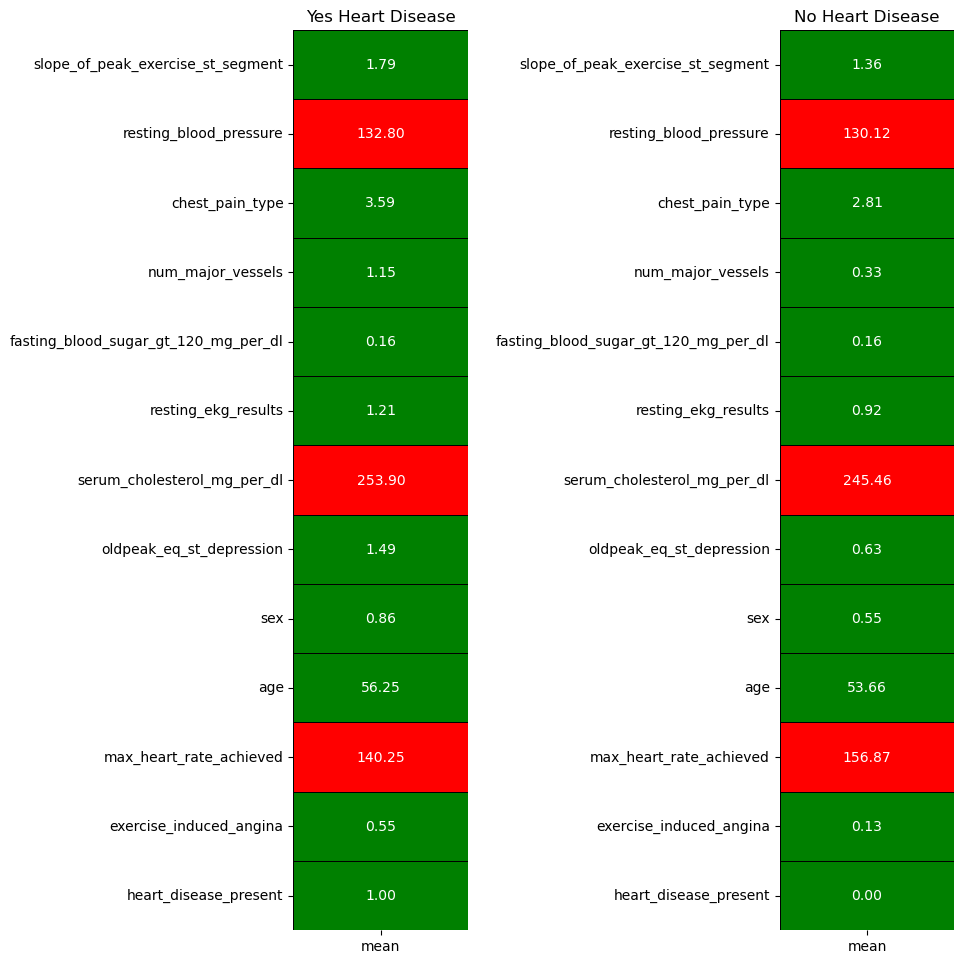

In [12]:
yes = com_data[com_data['heart_disease_present'] == 1].describe().T
no = com_data[com_data['heart_disease_present'] == 0].describe().T
colors = ['#F93822','#FDD20E']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (10,10))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = ['g', 'r'],linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Yes Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = ['g', 'r'],linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 2)

In [13]:
col = list(com_data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if (len(com_data[i].unique()) > 6) and (com_data[i].dtypes != 'object'):
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : patient_id slope_of_peak_exercise_st_segment thal chest_pain_type num_major_vessels fasting_blood_sugar_gt_120_mg_per_dl resting_ekg_results sex exercise_induced_angina heart_disease_present
Numerical Features : resting_blood_pressure serum_cholesterol_mg_per_dl oldpeak_eq_st_depression age max_heart_rate_achieved


Here, categorical features are defined if the the attribute has less than 6 unique elements else it is a numerical feature.
    Typical approach for this division of features can also be based on the datatypes of the elements of the respective attribute.

Eg : datatype = integer, attribute = numerical feature ; datatype = string, attribute = categorical feature

    For this dataset, as the number of features are less, we can manually check the dataset as well.

# Numerical Features

In [14]:
numerical_features

['resting_blood_pressure',
 'serum_cholesterol_mg_per_dl',
 'oldpeak_eq_st_depression',
 'age',
 'max_heart_rate_achieved']

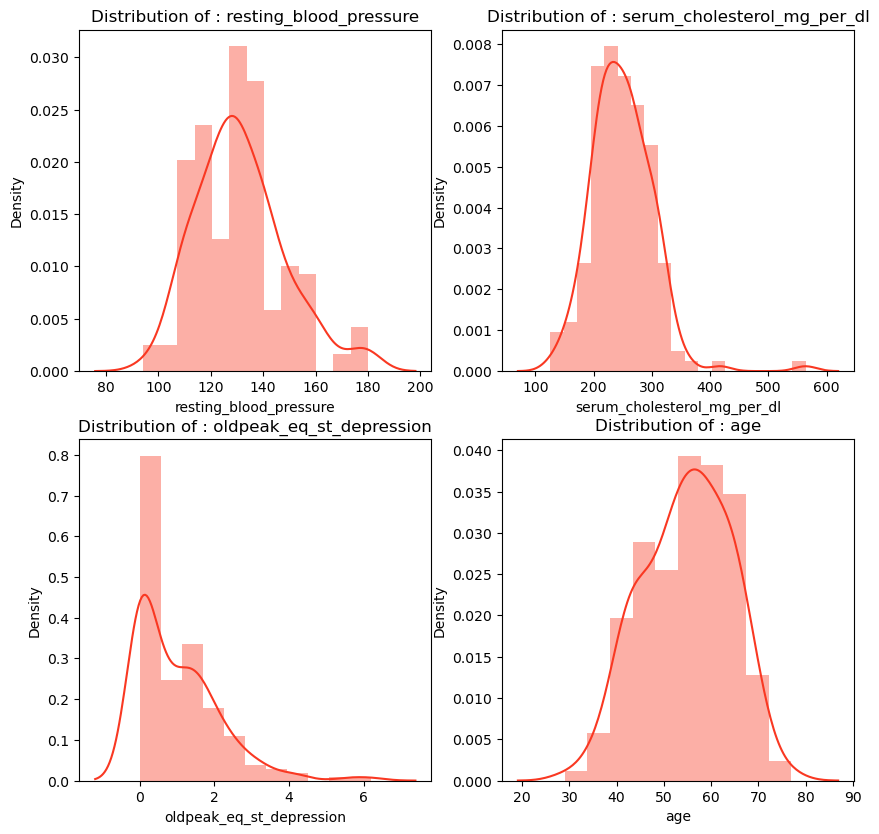

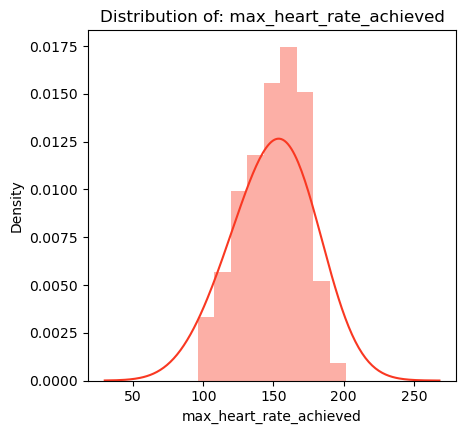

In [15]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (10,9.75))
for i in range(len(numerical_features) - 1):
    plt.subplot(2,2,i+1)
    sns.distplot(com_data[numerical_features[i]],color = colors[0])
    title = 'Distribution of : ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sns.distplot(com_data[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution of: ' + numerical_features[len(numerical_features) - 1]
plt.title(title);



# Target Variable Visualization (HeartDisease) :

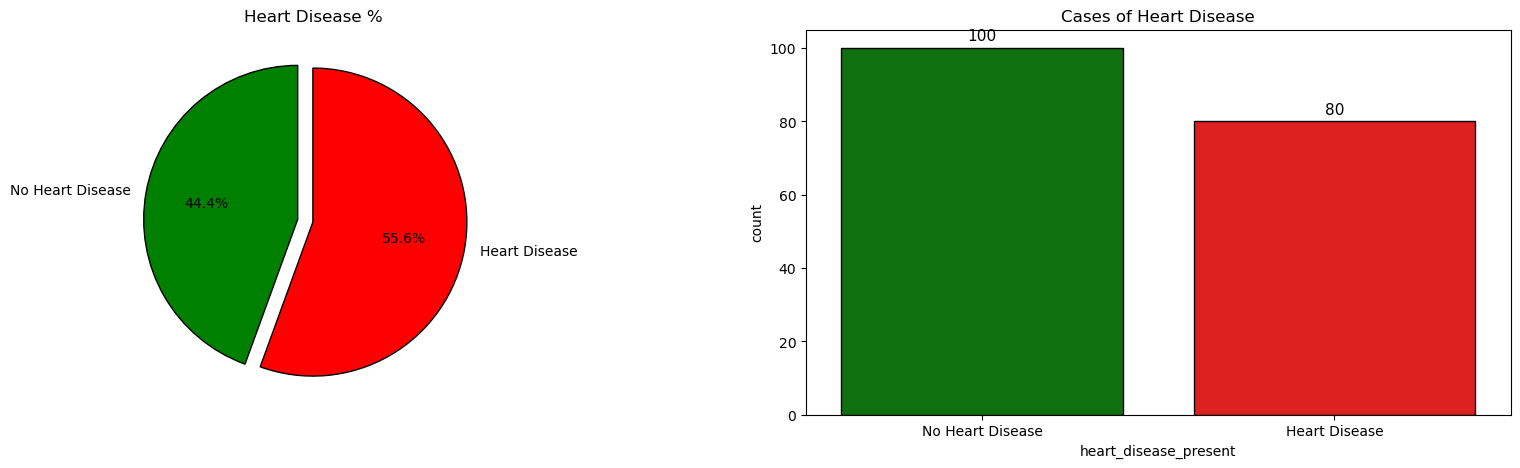

In [16]:
l = list(com_data['heart_disease_present'].value_counts())
circle = [l[1] / sum(l) * 100,l[0] / sum(l) * 100]

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['No Heart Disease','Heart Disease'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = ['g', 'r'],
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Heart Disease %');

plt.subplot(1,2,2)
ax = sns.countplot('heart_disease_present',data = com_data,palette = ['g', 'r'],edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Heart Disease','Heart Disease'])
plt.title('Cases of Heart Disease');
plt.show()

# Categorical Features vs Target Variable (heart disease present) 

In [17]:
com_data[categorical_features]

,patient_id,slope_of_peak_exercise_st_segment,thal,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,sex,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,2,0,0,2,1,0,0
1,ryoo3j,2,normal,3,0,0,0,0,0,0
2,yt1s1x,1,normal,4,3,0,2,1,1,1
3,l2xjde,1,reversible_defect,4,0,0,0,1,0,1
4,oyt4ek,3,reversible_defect,1,0,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,4,2,1,0,1,0,1
176,2s2b1f,2,normal,4,0,0,1,0,1,1
177,nsd00i,2,reversible_defect,3,0,0,0,1,1,1
178,0xw93k,1,normal,3,2,1,0,1,0,0


# Numerical Features vs Target Variable (heart disease present) 

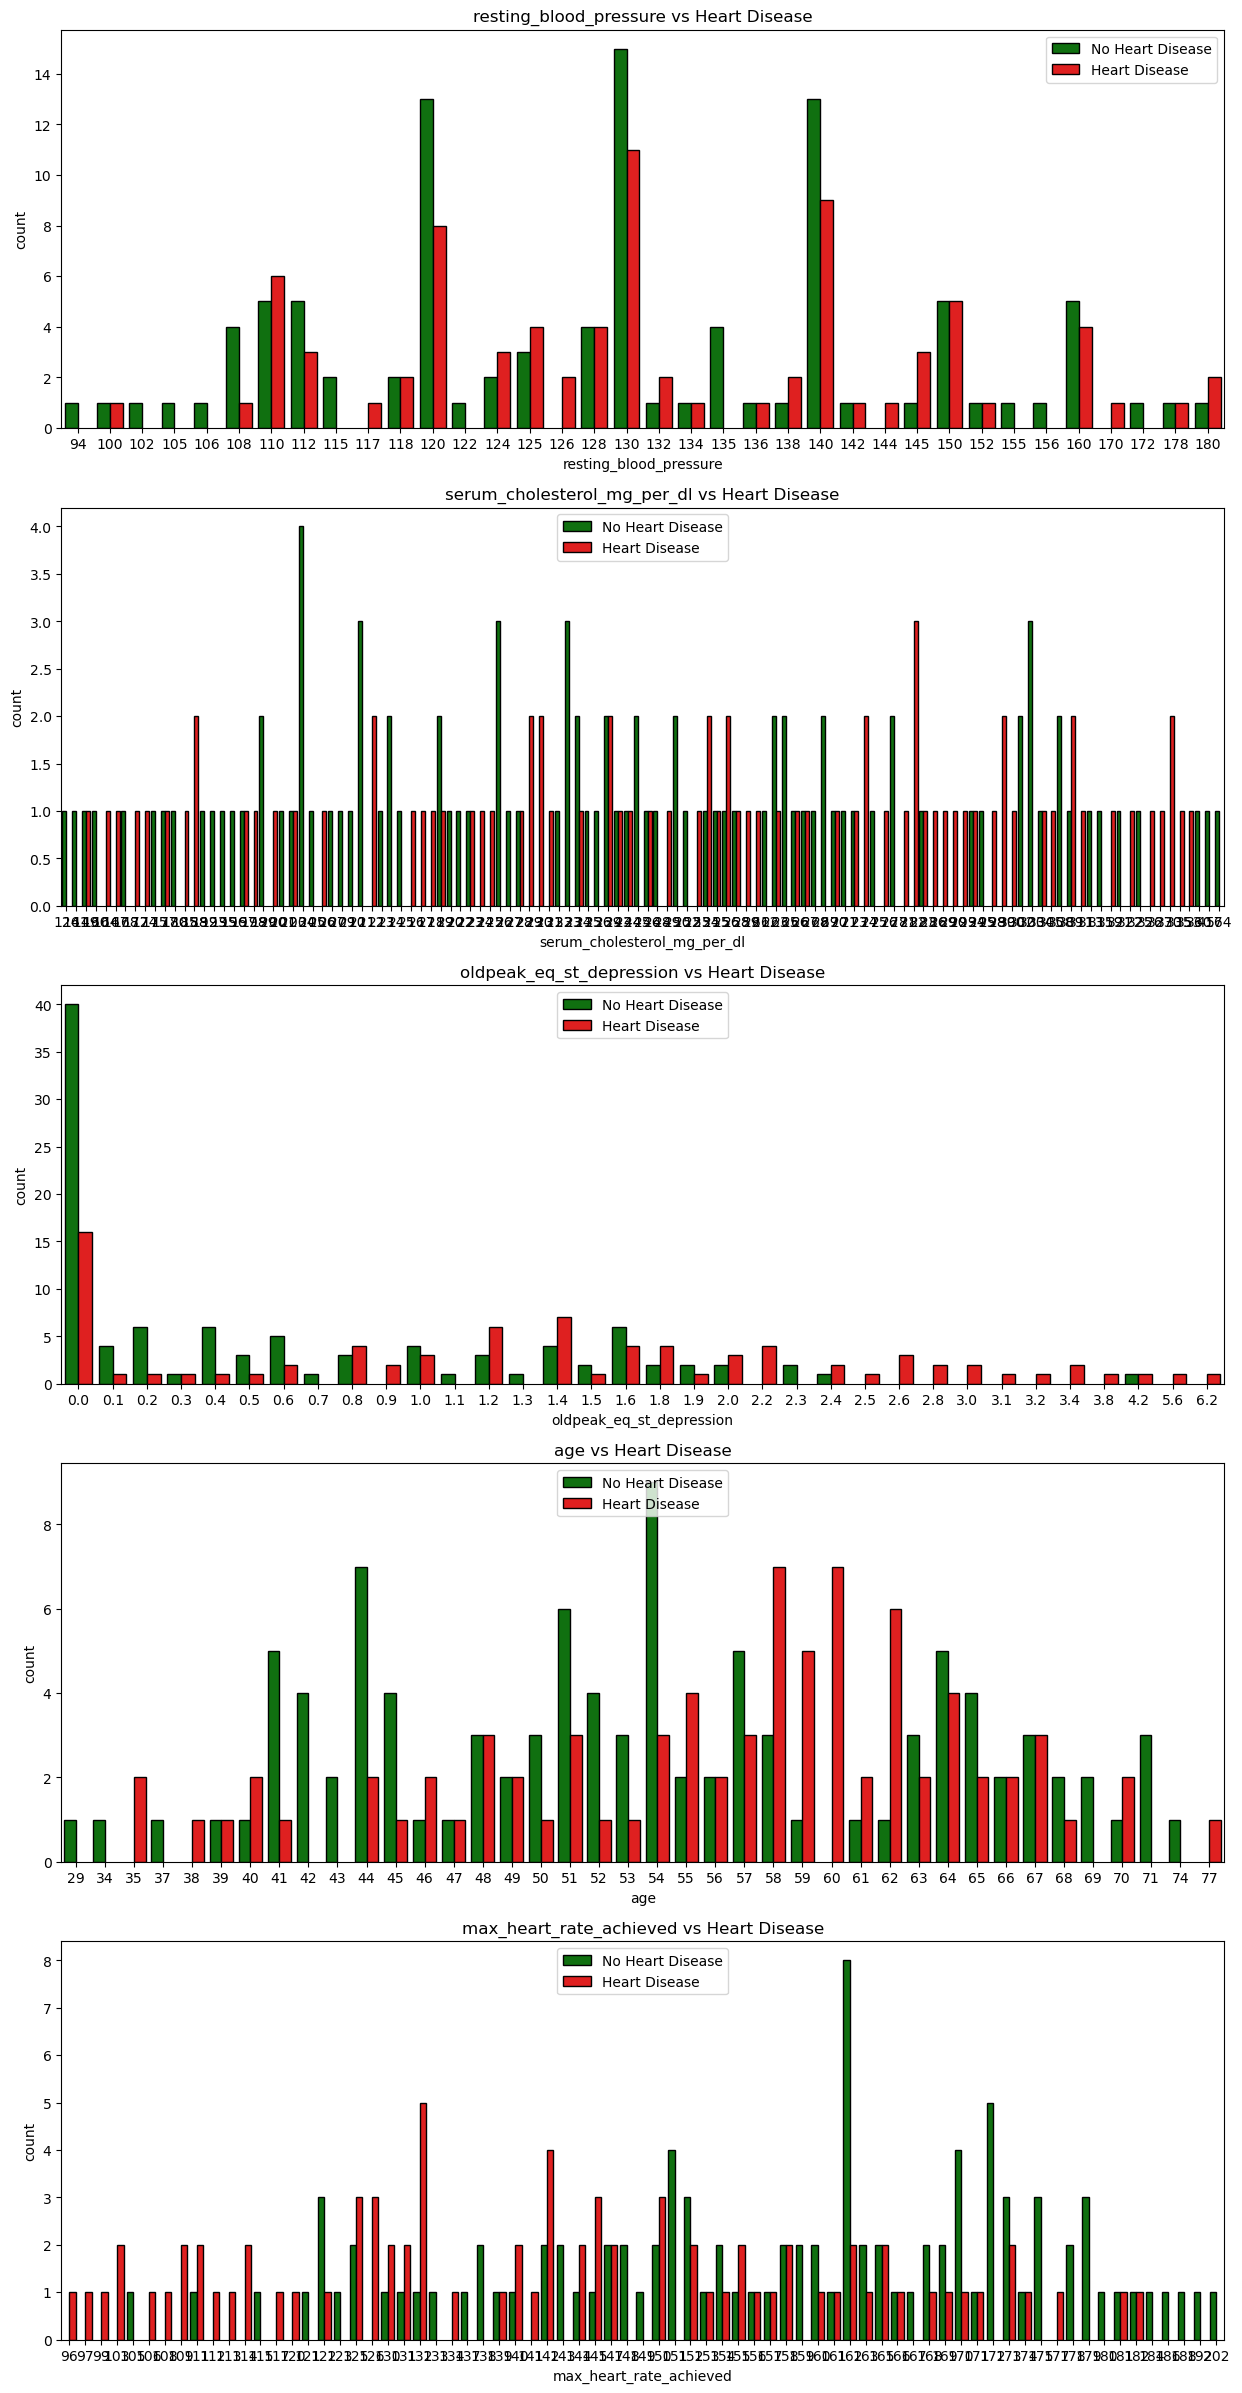

In [18]:
fig, ax = plt.subplots(nrows = 5,ncols = 1,figsize = (15,30))
for i in range(len(numerical_features)):
    plt.subplot(5,1,i+1)
    sns.countplot(numerical_features[i],data = com_data,hue = "heart_disease_present",palette = ['g', 'r'], edgecolor = 'black')
    title = numerical_features[i] + ' vs Heart Disease'
    plt.legend(['No Heart Disease','Heart Disease'])
    plt.title(title);

Because of too many unique data points in the above features, it is difficult to gain any type of insight. Thus, we will convert these numerical features,except age, into categorical features for understandable visualization and gaining insights purposes.

Thus, we scale the individual values of these features. This brings the varied data points to a constant value that represents a range of values.

Here, we divide the data points of the numerical features by 5 or 10 and assign its quotient value as the representative constant for that data point. The scaling constants of 5 & 10 are decided by looking into the data & intuition.


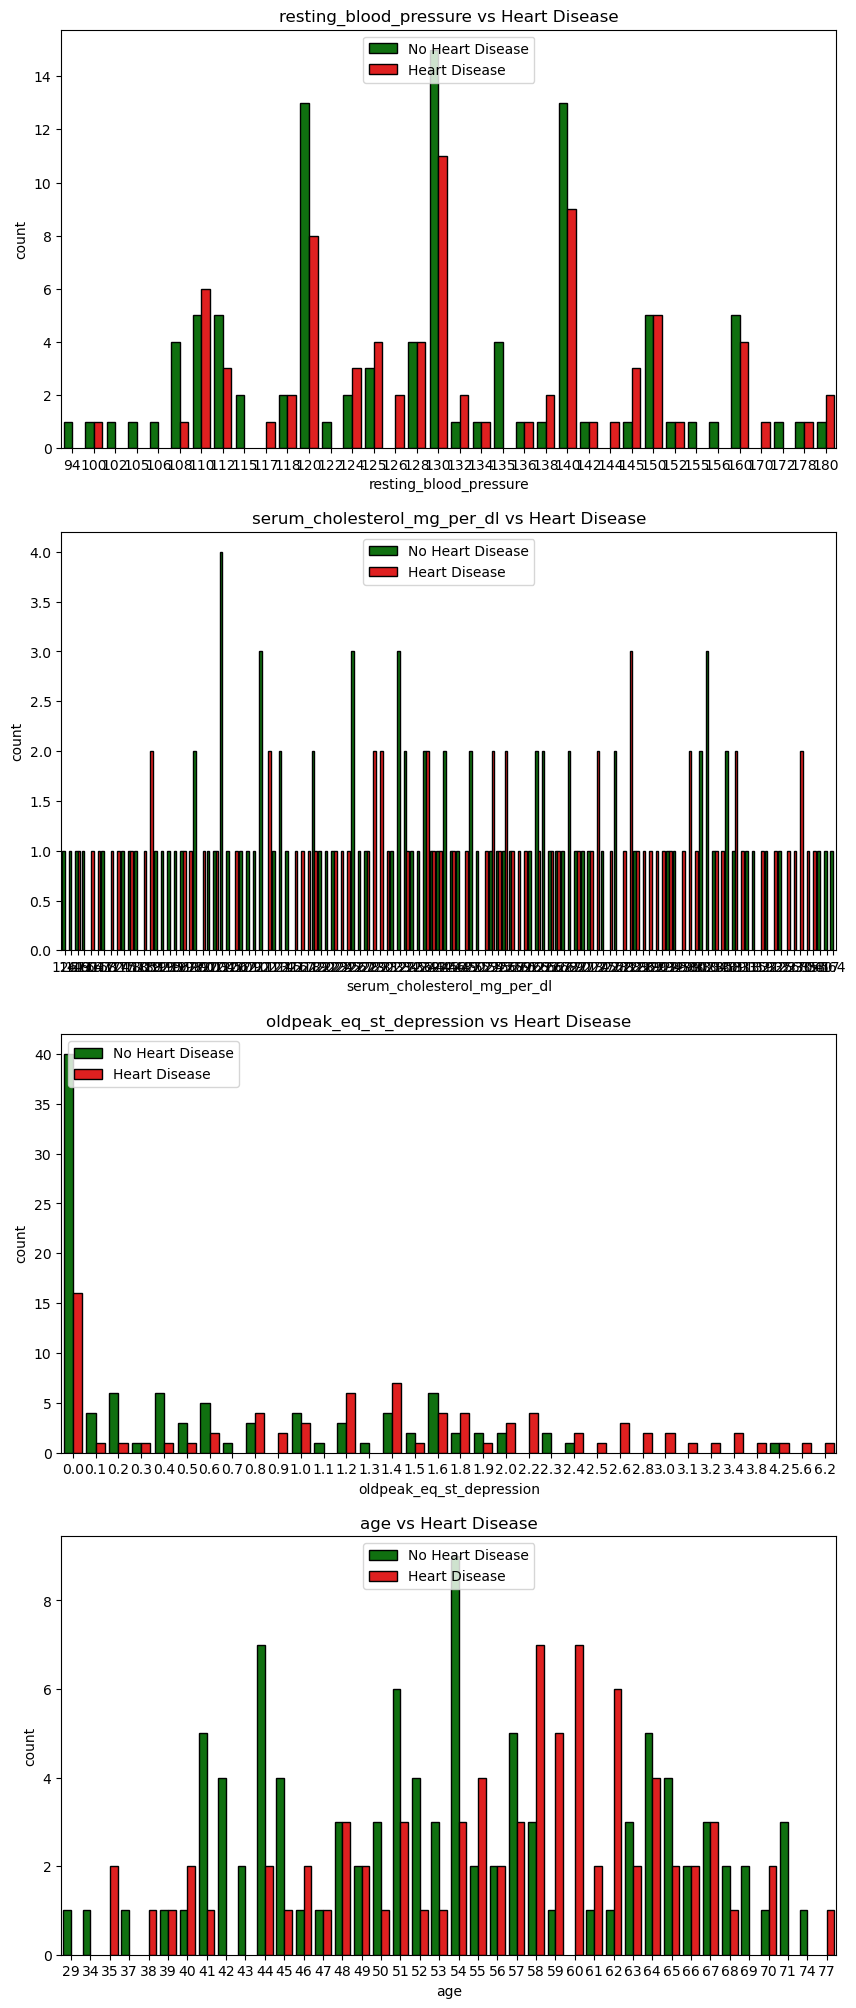

In [19]:
fig, ax = plt.subplots(nrows = 4,ncols = 1,figsize = (10,25))
group_numerical_features = [i + '_Group' for i in numerical_features[1:]]
for i in range(len(group_numerical_features)):
    plt.subplot(4,1,i+1)
    sns.countplot(numerical_features[i],data = com_data,hue = "heart_disease_present",palette = ['g', 'r'], edgecolor = 'black')
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Heart Disease'
    plt.title(title);

# Numerical features vs Categorical features w.r.t Target variable(HeartDisease)

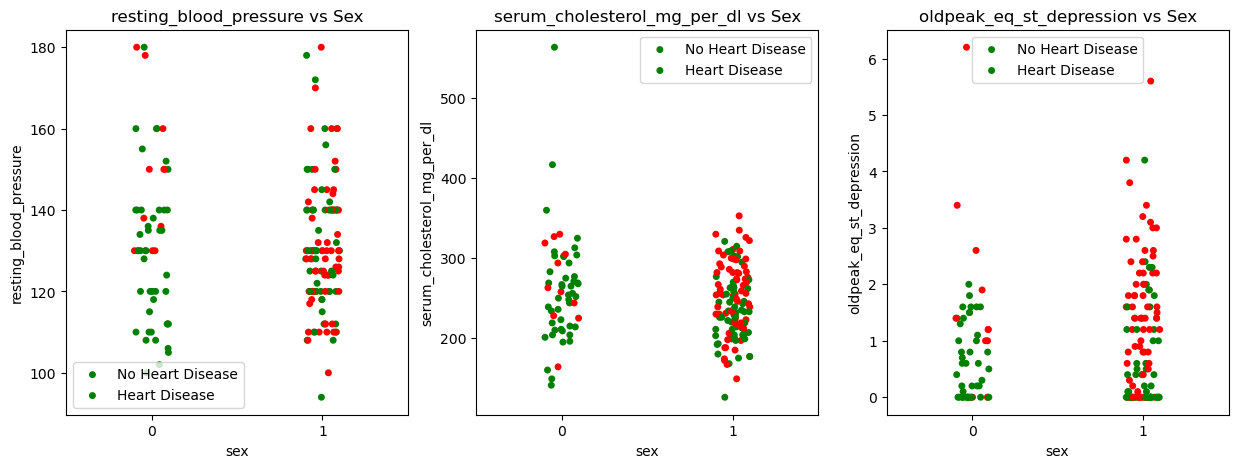

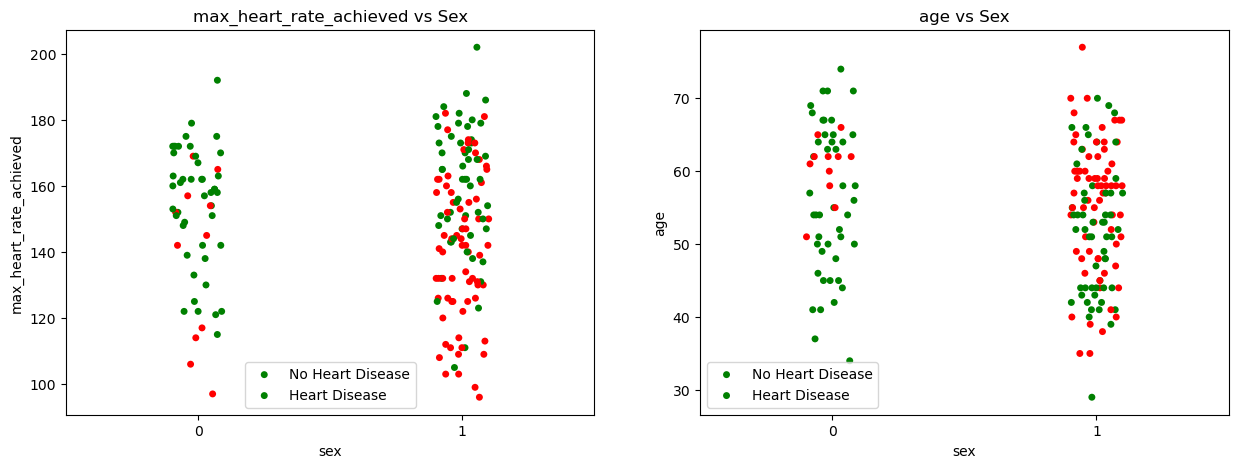

In [20]:


fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'sex',y = numerical_features[i],data = com_data,hue = 'heart_disease_present',palette = ['g', 'r']);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'sex',y = numerical_features[i],data = com_data,hue = 'heart_disease_present',palette = ['g', 'r']);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex' 
    plt.title(title);



Male population displays heart diseases at near about all the values of the numerical features. Above the age of 50, positive old peak values and maximum heart rate below 140, heart diseases in male population become dense.

Female population data points are very less as compared to male population data points. Hence, we cannot point to specific ranges or values that display cases of heart diseases

# ChestPainType vs Numerical Features

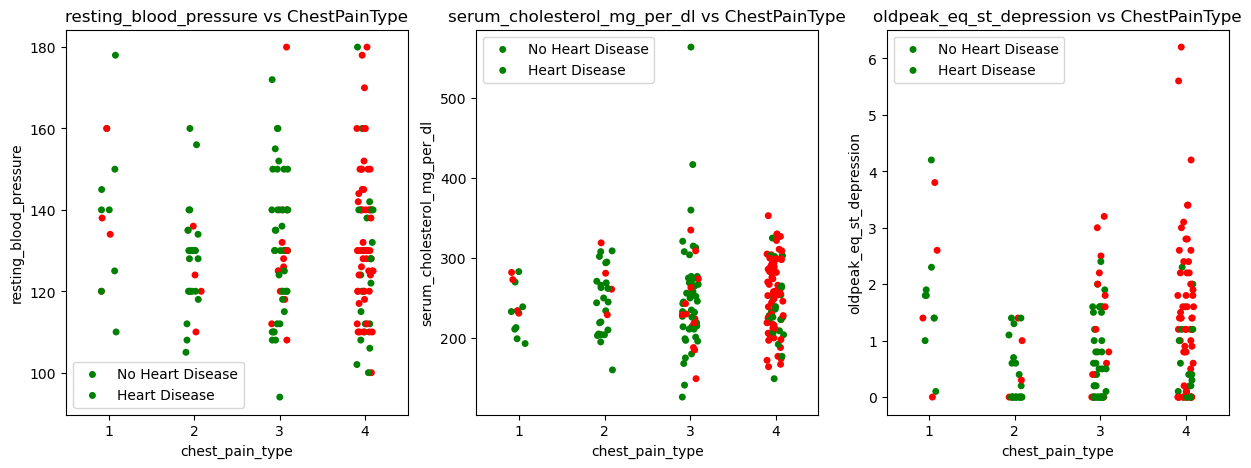

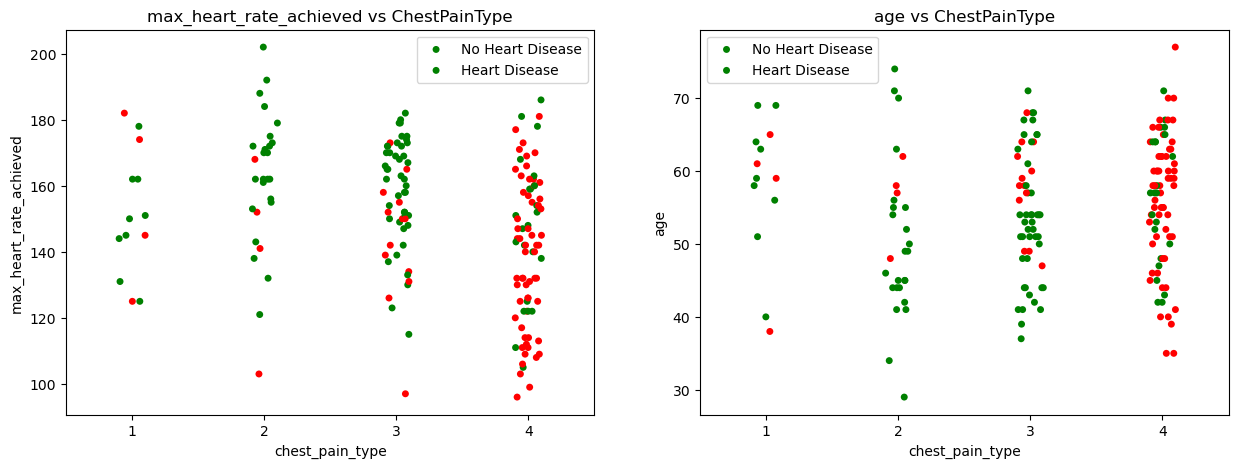

In [21]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'chest_pain_type',y = numerical_features[i],data = com_data,hue = 'heart_disease_present',palette = ['g', 'r']);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ChestPainType'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'chest_pain_type',y = numerical_features[i],data = com_data,hue = 'heart_disease_present',palette = ['g', 'r']);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ChestPainType' 
    plt.title(title);

# FastingBS vs Numerical features

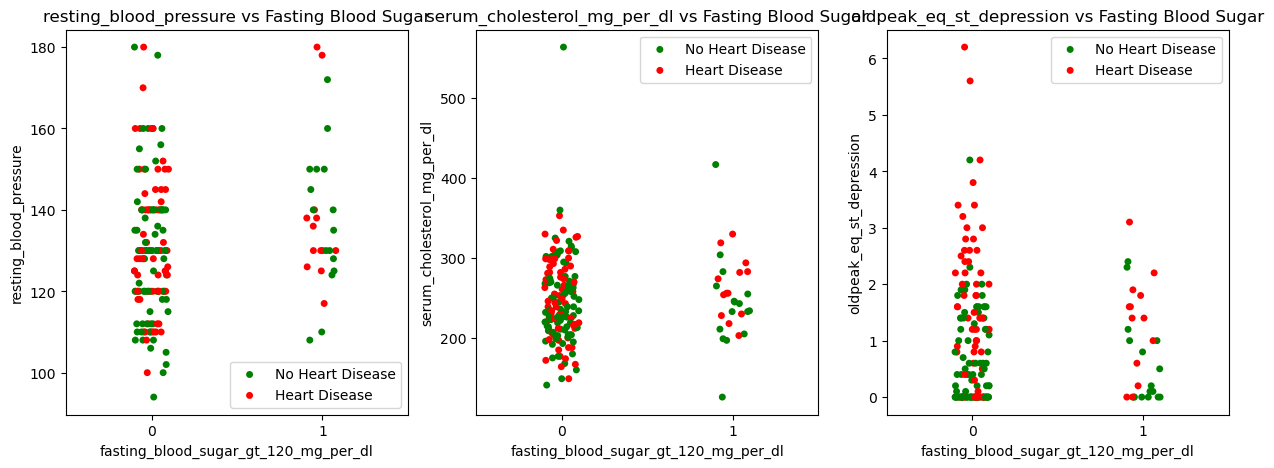

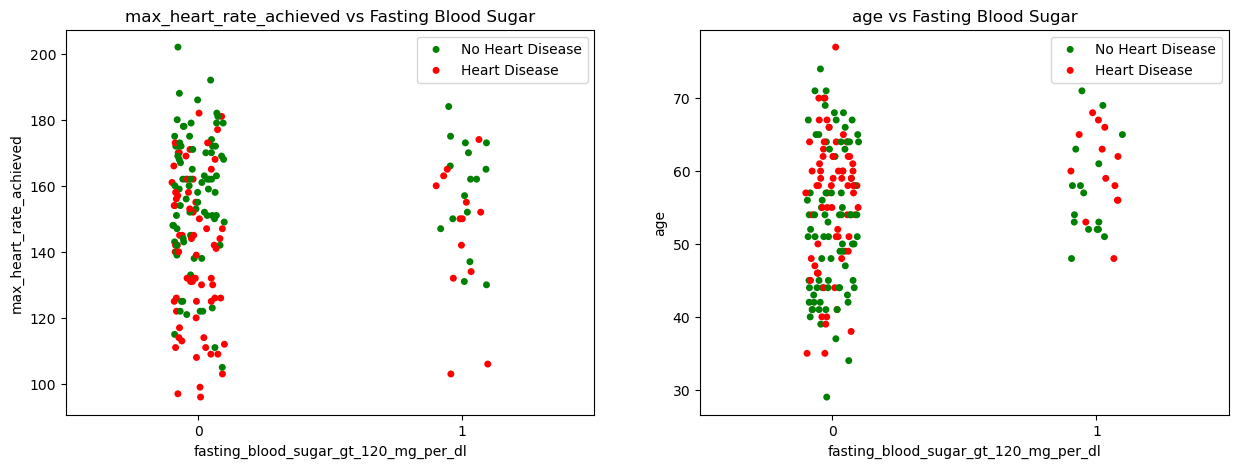

In [22]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'fasting_blood_sugar_gt_120_mg_per_dl',y = numerical_features[i],data = com_data,hue = 'heart_disease_present',palette = ['g', 'r']);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Fasting Blood Sugar' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'fasting_blood_sugar_gt_120_mg_per_dl',y = numerical_features[i],data = com_data,hue = 'heart_disease_present',palette = ['g', 'r']);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Fasting Blood Sugar' 
    plt.title(title);

# Numerical features vs Numerical features w.r.t Target variable(Heart Disease Present) 

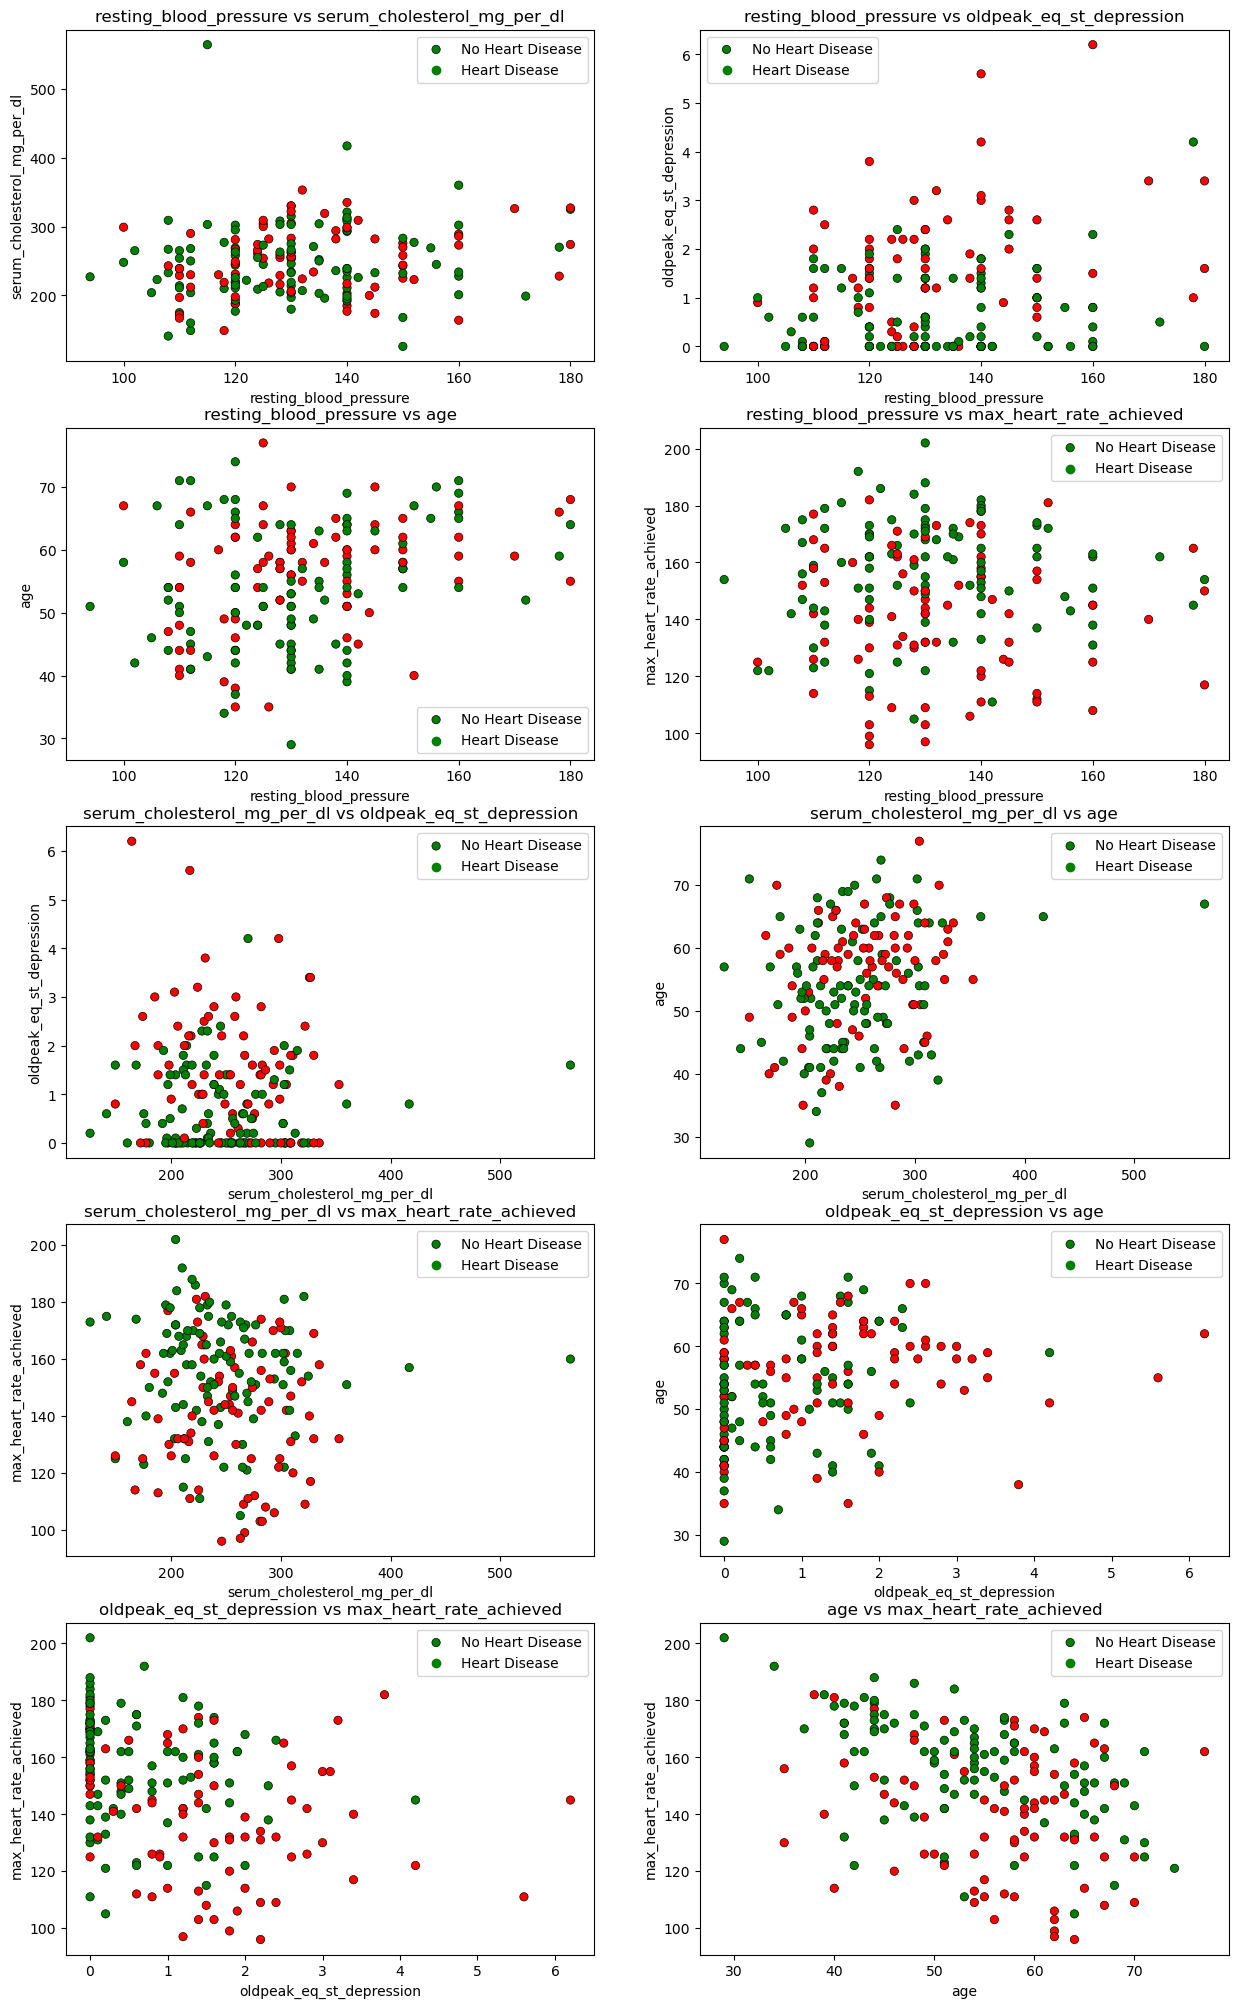

In [23]:
a = 0
fig,ax = plt.subplots(nrows = 5,ncols = 2,figsize = (15,25))
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(5,2,a)
            sns.scatterplot(x = numerical_features[i],y = numerical_features[j],data = com_data, hue = 'heart_disease_present',palette = ['g', 'r'], edgecolor = 'black');
            plt.legend(['No Heart Disease', 'Heart Disease'])
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)



For age 50+, RestingBP between 100 - 175, Cholesterol level of 200 - 300,Max Heart Rate below 160 and positive oldpeak values displays high cases of heart disease.

For RestingBP values 100 - 175, highlights too many heart disease patients for all the features.

Cholesterol values 200 - 300 dominates the heart disease cases.

Similarly, Max Heart Rate values below 140 has high probability of being diagnosed with heart diseases.



# Feature Engineering

Data Scaling

In [24]:
df1 = com_data.copy()
df1.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [25]:
df1['thal']

0                 normal
1                 normal
2                 normal
3      reversible_defect
4      reversible_defect
             ...        
175    reversible_defect
176               normal
177    reversible_defect
178               normal
179               normal
Name: thal, Length: 180, dtype: object

In [26]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data to numerical labels
encoded_thal = label_encoder.fit_transform(df1['thal'])

# print("Encoded thal:", encoded_thal)
df1['thal'] = encoded_thal

In [27]:
# Drop the 'Age' column
df1.drop('patient_id', axis = 1, inplace = True)
df1

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,2,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,1,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,2,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,1,124,3,2,1,0,255,0.0,1,48,175,0,0


In [29]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['oldpeak_eq_st_depression'] = mms.fit_transform(df1[['oldpeak_eq_st_depression']])
df1['age'] = ss.fit_transform(df1[['age']])
df1['resting_blood_pressure'] = ss.fit_transform(df1[['resting_blood_pressure']])
df1['serum_cholesterol_mg_per_dl'] = ss.fit_transform(df1[['serum_cholesterol_mg_per_dl']])
df1['max_heart_rate_achieved'] = ss.fit_transform(df1[['max_heart_rate_achieved']])
df1.head()



,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,1,-0.195195,2,0,0,2,1.118269,0.000000,1,-1.053964,0.932485,0,0
1,2,1,-1.256320,3,0,0,0,-0.669778,0.258065,0,-0.087134,0.387084,0,0
2,1,1,-0.372049,4,3,0,2,1.042182,0.000000,1,2.383654,0.568884,1,1
3,1,2,1.219639,4,0,0,0,-0.498582,0.000000,1,-1.591092,1.432436,0,1
4,3,2,2.752375,1,0,0,2,0.395442,0.677419,1,0.449994,-0.203768,0,0


In [44]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
slope_of_peak_exercise_st_segment,180.0,1.550000e+00,0.618838,1.000000,1.000000,1.000000,2.000000,3.000000
thal,180.0,1.366667e+00,0.568247,0.000000,1.000000,1.000000,2.000000,2.000000
resting_blood_pressure,180.0,4.773959e-16,1.002789,-2.199542,-0.666806,-0.077292,0.512222,2.870278
chest_pain_type,180.0,3.155556e+00,0.938454,1.000000,3.000000,3.000000,4.000000,4.000000
num_major_vessels,180.0,6.944444e-01,0.969347,0.000000,0.000000,0.000000,1.000000,3.000000
fasting_blood_sugar_gt_120_mg_per_dl,180.0,1.611111e-01,0.368659,0.000000,0.000000,0.000000,0.000000,1.000000
resting_ekg_results,180.0,1.050000e+00,0.998742,0.000000,0.000000,2.000000,2.000000,2.000000
serum_cholesterol_mg_per_dl,180.0,2.960595e-17,1.002789,-2.343694,-0.674533,-0.070592,0.609437,5.987844
oldpeak_eq_st_depression,180.0,1.629032e-01,0.180864,0.000000,0.000000,0.129032,0.258065,1.000000
sex,180.0,6.888889e-01,0.464239,0.000000,0.000000,1.000000,1.000000,1.000000


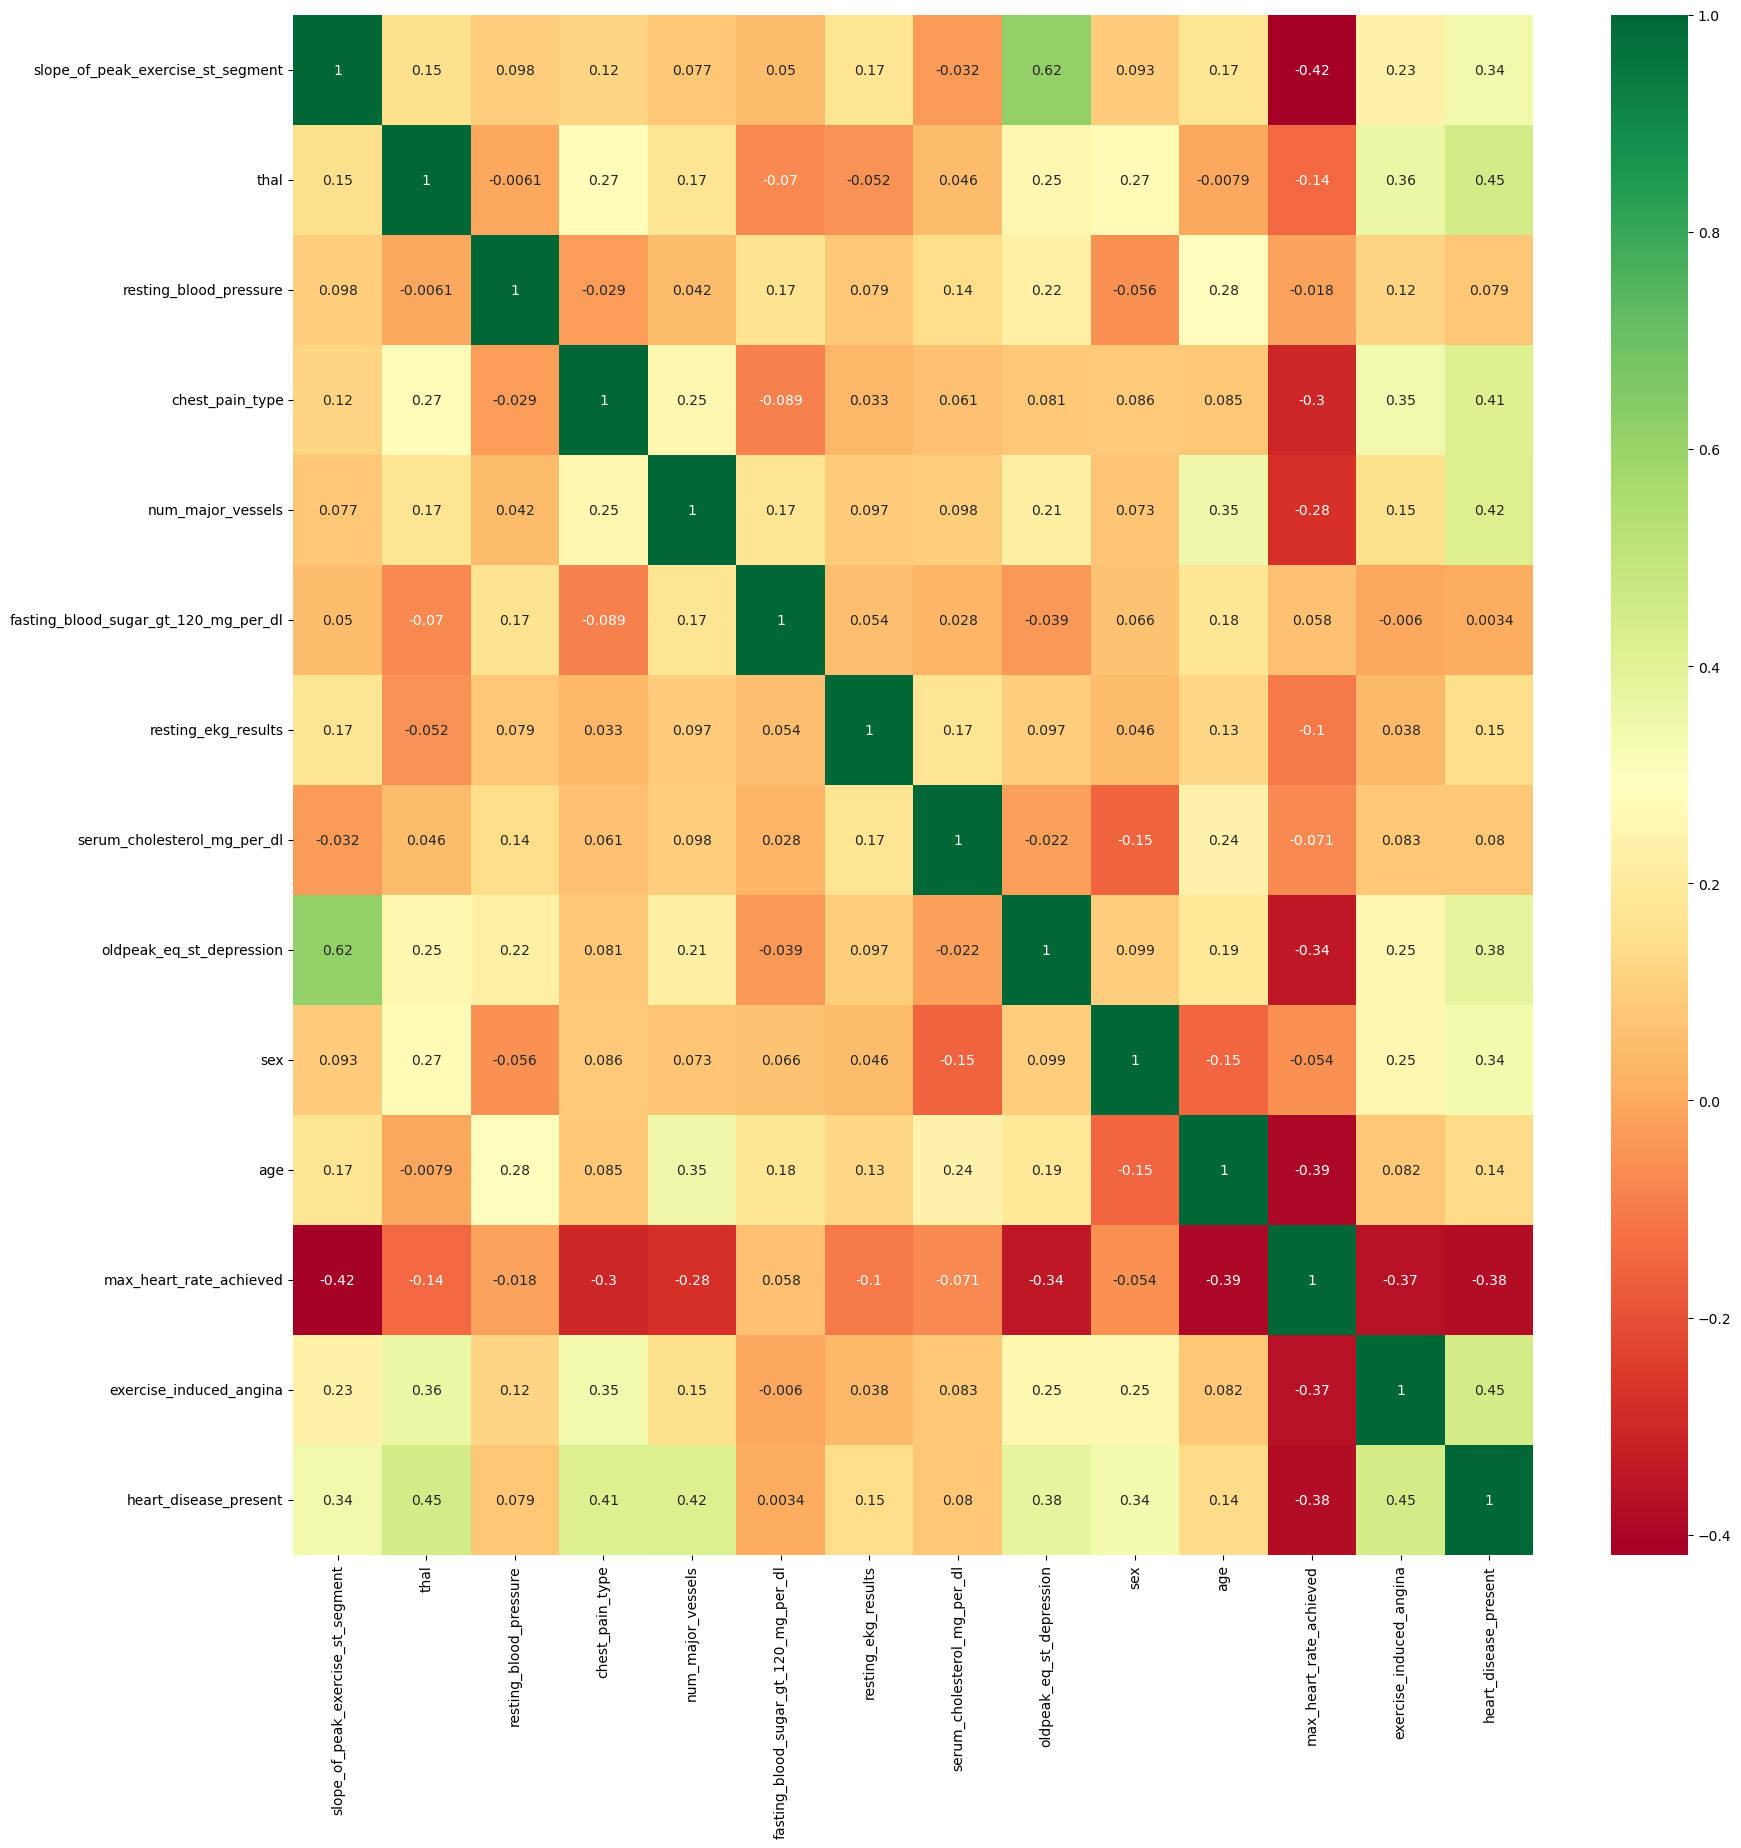

In [36]:
plt.figure(figsize = (20,20))
sns.heatmap(df1.corr(),cmap = 'RdYlGn',annot = True);

In [41]:
df1_list = list(df1.keys() )
df1_list

['slope_of_peak_exercise_st_segment',
 'thal',
 'resting_blood_pressure',
 'chest_pain_type',
 'num_major_vessels',
 'fasting_blood_sugar_gt_120_mg_per_dl',
 'resting_ekg_results',
 'serum_cholesterol_mg_per_dl',
 'oldpeak_eq_st_depression',
 'sex',
 'age',
 'max_heart_rate_achieved',
 'exercise_induced_angina',
 'heart_disease_present']

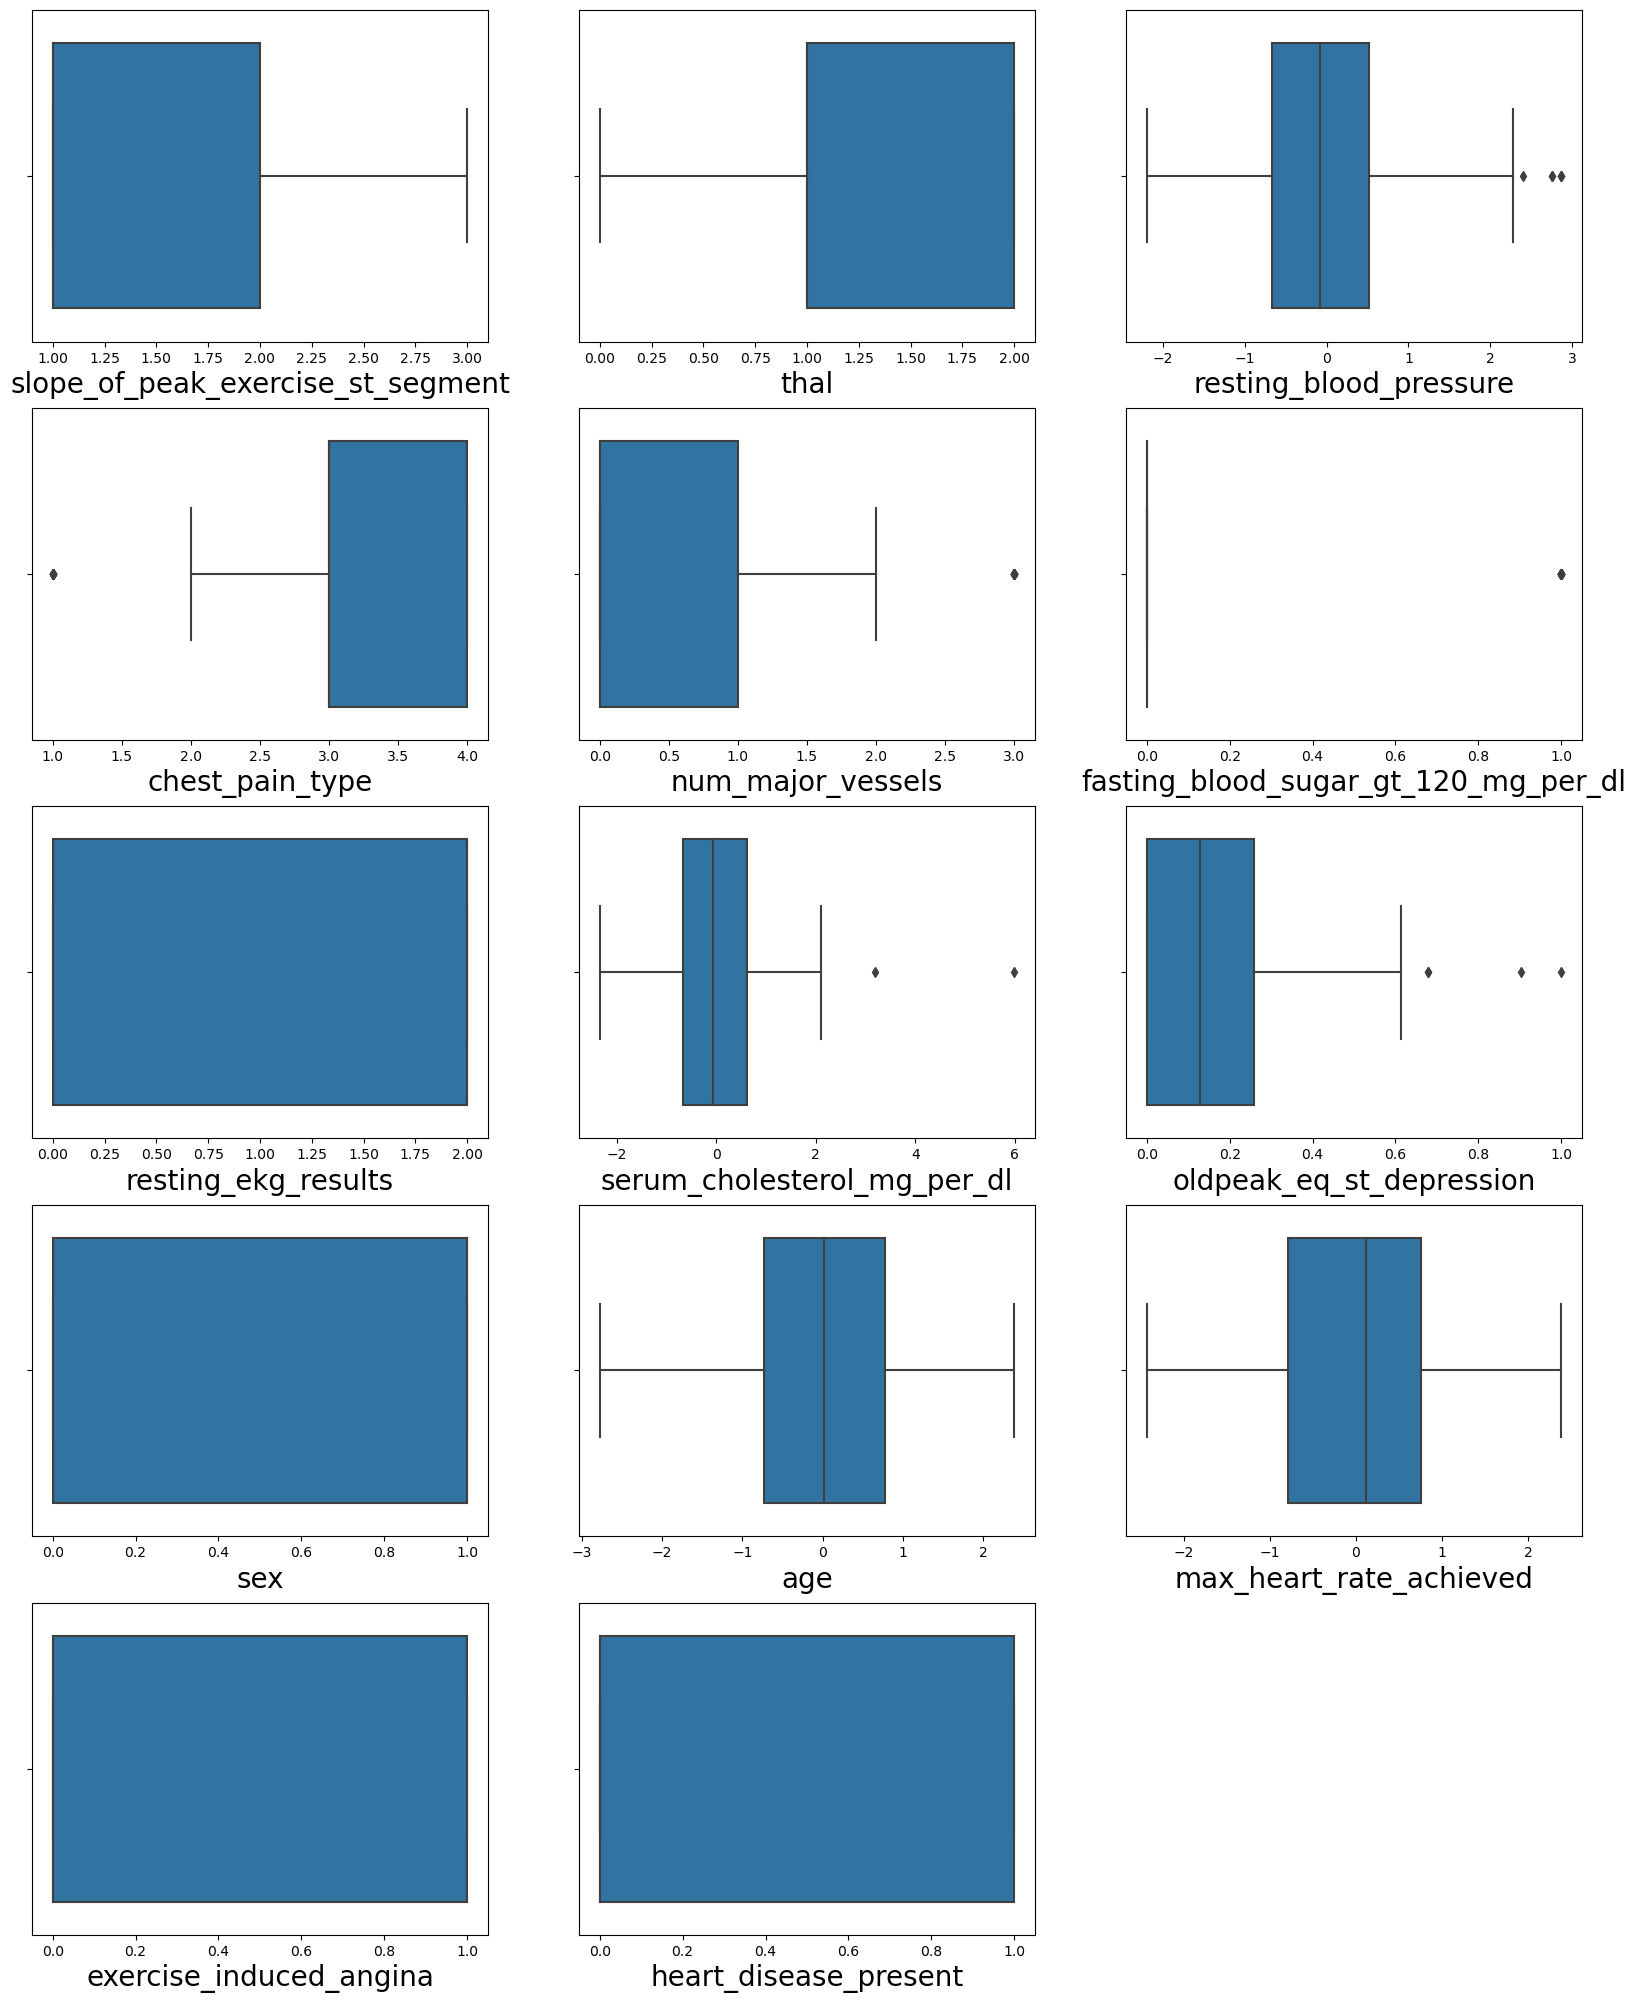

In [34]:
# let's see how data is distributed for every continious data point
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df1:
    if plotnumber<=15 :     # as there are  columns in the data
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(x= df1[column],data=df1)
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

# Model Creation

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [46]:
features = df1[df1.columns.drop(['heart_disease_present'])].values
target = df1['heart_disease_present'].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 2)

Selecting the features from the above conducted tests and splitting the data into 80 - 20 train - test groups.

In [47]:
features

array([[ 1.        ,  1.        , -0.19519463, ..., -1.05396422,
         0.93248505,  0.        ],
       [ 2.        ,  1.        , -1.25631978, ..., -0.08713407,
         0.38708356,  0.        ],
       [ 1.        ,  1.        , -0.37204882, ...,  2.38365407,
         0.56888406,  1.        ],
       ...,
       [ 2.        ,  2.        , -0.37204882, ...,  0.98712164,
        -0.8400698 ,  1.        ],
       [ 1.        ,  1.        , -0.43100022, ..., -0.7316875 ,
         1.15973567,  0.        ],
       [ 1.        ,  1.        ,  1.69125009, ..., -0.08713407,
         0.61433418,  0.        ]])

In [48]:
target

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0])

In [54]:
def model(classifier):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = ['g', 'r'],fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

# Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2') 

Accuracy :  75.00%
Cross Validation Score :  90.90%
ROC_AUC Score :  75.00%


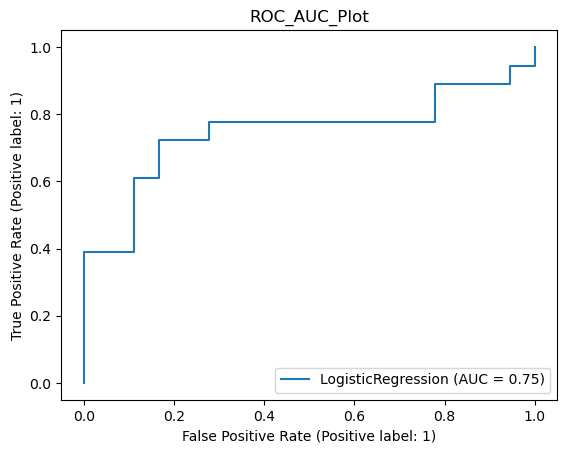

In [57]:
model(classifier_lr)

              precision    recall  f1-score   support

           0       0.71      0.83      0.77        18
           1       0.80      0.67      0.73        18

    accuracy                           0.75        36
   macro avg       0.76      0.75      0.75        36
weighted avg       0.76      0.75      0.75        36



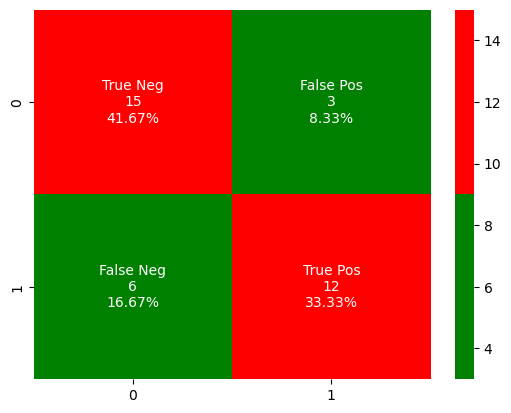

In [58]:
model_evaluation(classifier_lr)

# Support Vector Classifier

In [59]:
from sklearn.svm import SVC

In [60]:
classifier_svc = SVC(kernel = 'linear',C = 0.1)

Accuracy :  69.44%
Cross Validation Score :  91.51%
ROC_AUC Score :  69.44%


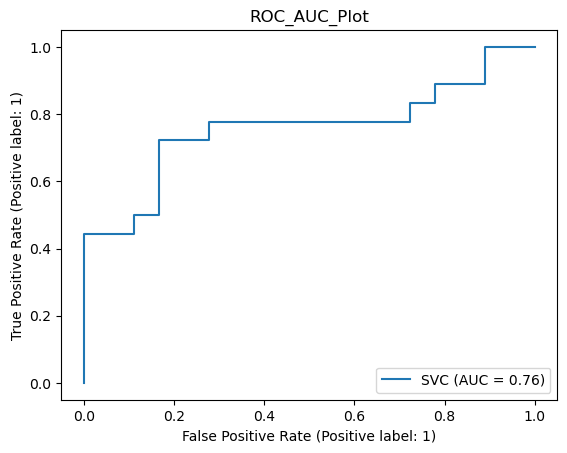

In [61]:
model(classifier_svc)

              precision    recall  f1-score   support

           0       0.65      0.83      0.73        18
           1       0.77      0.56      0.65        18

    accuracy                           0.69        36
   macro avg       0.71      0.69      0.69        36
weighted avg       0.71      0.69      0.69        36



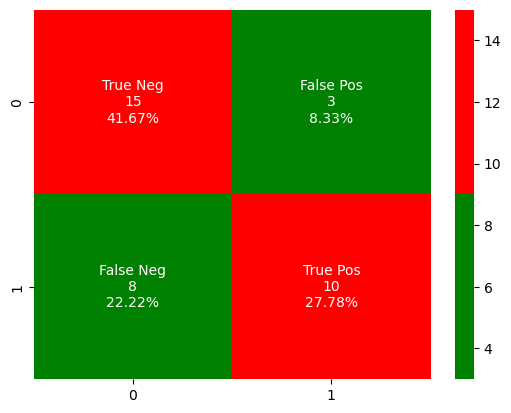

In [62]:
model_evaluation(classifier_svc)

# Decision Tree Classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

Accuracy :  66.67%
Cross Validation Score :  74.15%
ROC_AUC Score :  66.67%


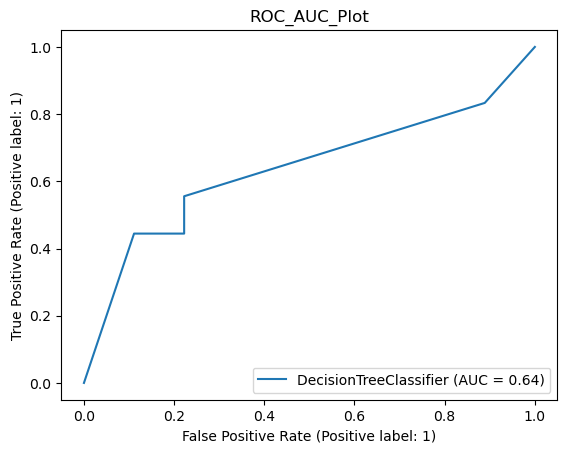

In [65]:
model(classifier_dt)

              precision    recall  f1-score   support

           0       0.64      0.78      0.70        18
           1       0.71      0.56      0.63        18

    accuracy                           0.67        36
   macro avg       0.68      0.67      0.66        36
weighted avg       0.68      0.67      0.66        36



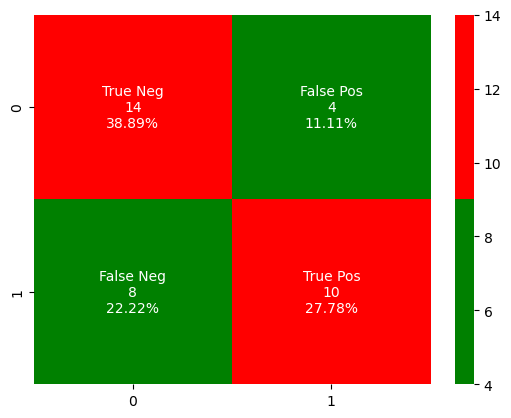

In [66]:
model_evaluation(classifier_dt)

# Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

Accuracy :  77.78%
Cross Validation Score :  91.39%
ROC_AUC Score :  77.78%


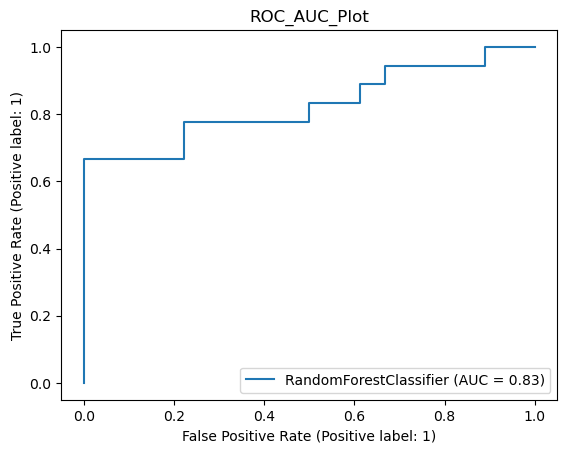

In [69]:
model(classifier_rf)

              precision    recall  f1-score   support

           0       0.69      1.00      0.82        18
           1       1.00      0.56      0.71        18

    accuracy                           0.78        36
   macro avg       0.85      0.78      0.77        36
weighted avg       0.85      0.78      0.77        36



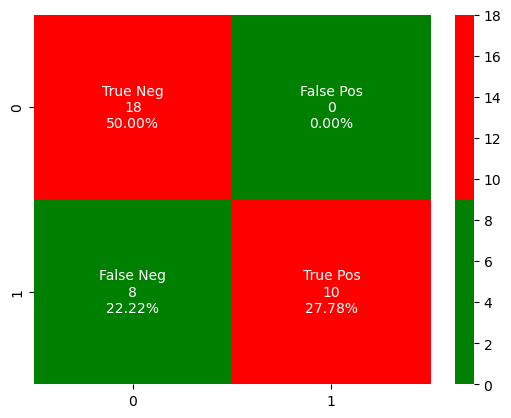

In [70]:
model_evaluation(classifier_rf)

# K-nearest Neighbors Classifier

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)

Accuracy :  80.56%
Cross Validation Score :  84.14%
ROC_AUC Score :  80.56%


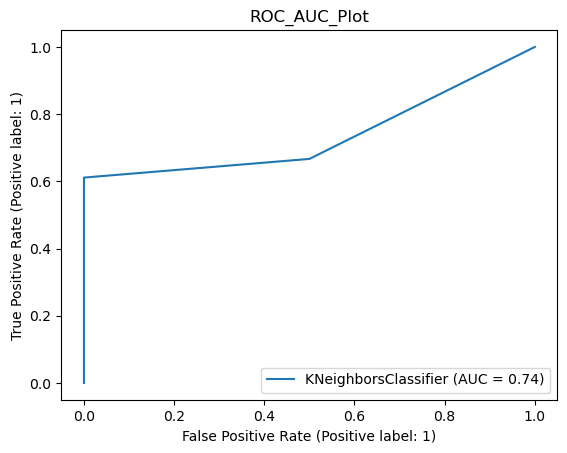

In [73]:
model(classifier_knn)

              precision    recall  f1-score   support

           0       0.72      1.00      0.84        18
           1       1.00      0.61      0.76        18

    accuracy                           0.81        36
   macro avg       0.86      0.81      0.80        36
weighted avg       0.86      0.81      0.80        36



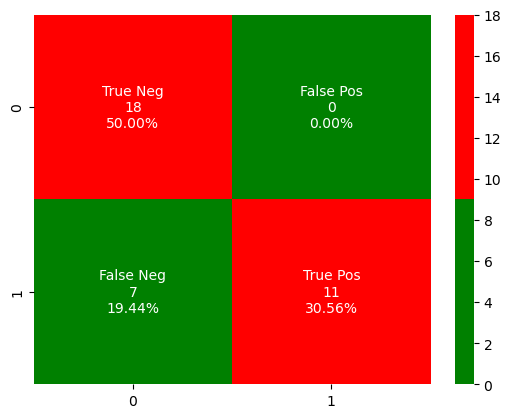

In [74]:
model_evaluation(classifier_knn)

# XGBoost

In [75]:
import xgboost as xgb

In [76]:
# Initialize the XGBClassifier
xgb_classifier = xgb.XGBClassifier(
    n_estimators=100,  # Number of boosting rounds (trees)
    learning_rate=0.1,  # Step size shrinkage to prevent overfitting
    max_depth=3,  # Maximum depth of each tree
    objective='binary:logistic',  # Objective function for binary classification
    random_state=42
)

Accuracy :  77.78%
Cross Validation Score :  89.76%
ROC_AUC Score :  77.78%


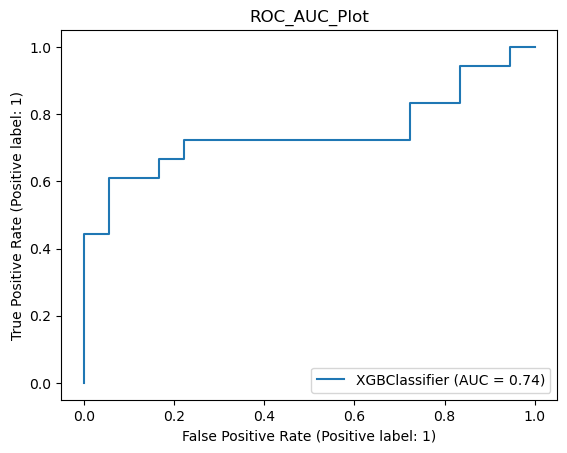

In [77]:
model(xgb_classifier)

              precision    recall  f1-score   support

           0       0.71      0.94      0.81        18
           1       0.92      0.61      0.73        18

    accuracy                           0.78        36
   macro avg       0.81      0.78      0.77        36
weighted avg       0.81      0.78      0.77        36



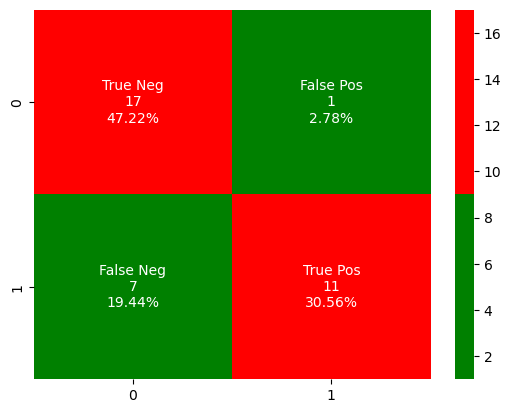

In [78]:
model_evaluation(xgb_classifier)

# Model Withhout SCalling

In [80]:
com_data

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [81]:
df2 = com_data.copy()
df2.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [82]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data to numerical labels
encoded_thal = label_encoder.fit_transform(df1['thal'])

# print("Encoded thal:", encoded_thal)
df2['thal'] = encoded_thal

In [83]:
df2

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,2,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,2,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,2,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,1,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,2,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,1,124,3,2,1,0,255,0.0,1,48,175,0,0


In [84]:
# Drop the 'Age' column
df2.drop('patient_id', axis = 1, inplace = True)
df2

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,2,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,1,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,2,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,1,124,3,2,1,0,255,0.0,1,48,175,0,0


In [85]:
features2 = df2[df2.columns.drop(['heart_disease_present'])].values
target2 = df2['heart_disease_present'].values
x_train, x_test, y_train, y_test = train_test_split(features2, target2, test_size = 0.20, random_state = 5)

In [86]:
def model2(classifier):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation2(classifier):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = ['g', 'r'],fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

In [87]:
classifier_lr2 = LogisticRegression(random_state = 0,C=10,penalty= 'l2') 

Accuracy :  80.56%
Cross Validation Score :  86.89%
ROC_AUC Score :  80.91%


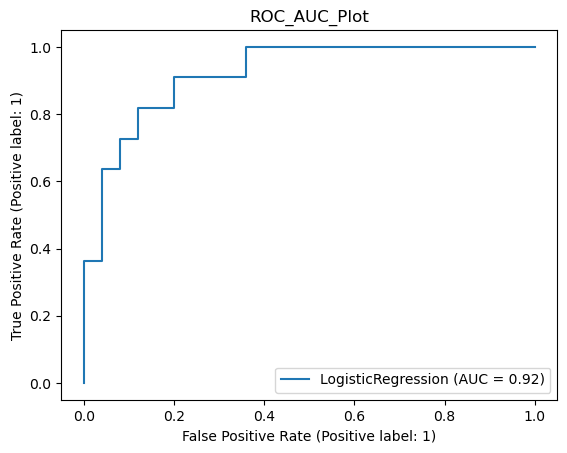

In [89]:
model2(classifier_lr2)

              precision    recall  f1-score   support

           0       0.91      0.80      0.85        25
           1       0.64      0.82      0.72        11

    accuracy                           0.81        36
   macro avg       0.78      0.81      0.79        36
weighted avg       0.83      0.81      0.81        36



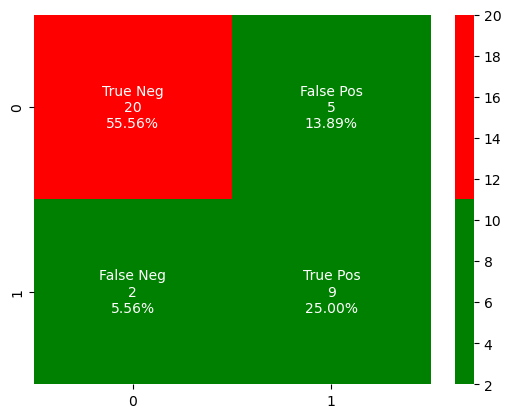

In [90]:
model_evaluation2(classifier_lr2)

In [92]:
# Initialize the XGBClassifier
xgb_classifier2 = xgb.XGBClassifier(
    n_estimators=100,  # Number of boosting rounds (trees)
    learning_rate=0.1,  # Step size shrinkage to prevent overfitting
    max_depth=3,  # Maximum depth of each tree
    objective='binary:logistic',  # Objective function for binary classification
    random_state=42
)

Accuracy :  75.00%
Cross Validation Score :  86.70%
ROC_AUC Score :  74.36%


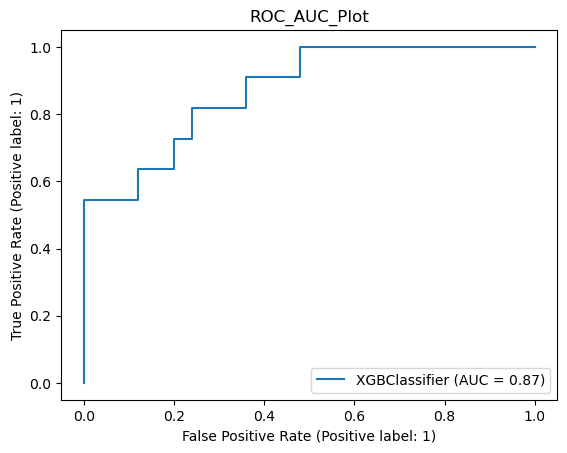

In [93]:
model2(xgb_classifier2)

In [94]:
classifier_rf2 = RandomForestClassifier(max_depth = 4,random_state = 0)

Accuracy :  83.33%
Cross Validation Score :  88.66%
ROC_AUC Score :  82.91%


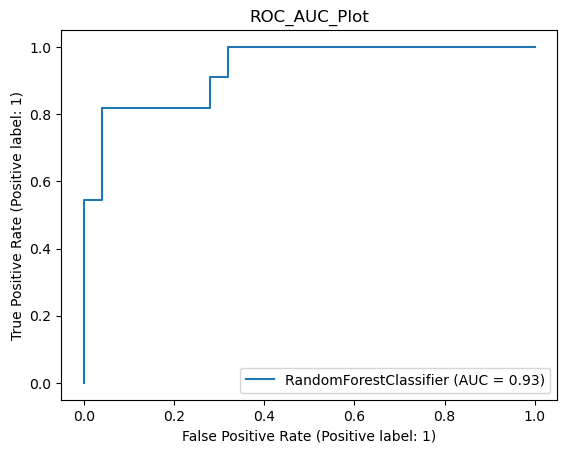

In [95]:
model2(classifier_rf2)

              precision    recall  f1-score   support

           0       0.91      0.84      0.87        25
           1       0.69      0.82      0.75        11

    accuracy                           0.83        36
   macro avg       0.80      0.83      0.81        36
weighted avg       0.85      0.83      0.84        36



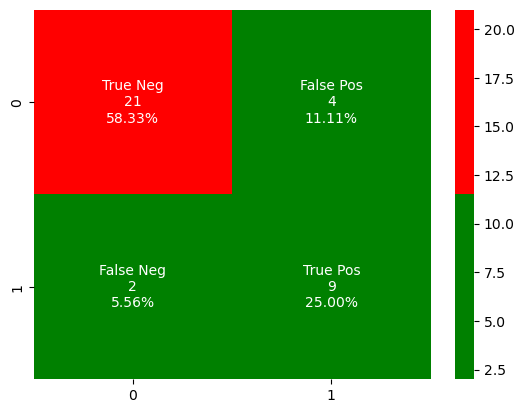

In [97]:
model_evaluation2(classifier_rf2)

Machine learning commonly employs ROC (Receiver Operating Characteristic) and AUC (Area Under the ROC Curve) as evaluation metrics for assessing the performance of binary classification models.

The ROC Curve is a graphical representation that depicts a binary classifier's performance as the discrimination threshold varies. By plotting the true positive rate (TPR) against the false positive rate (FPR) at different threshold settings, it illustrates the trade-off between correctly identifying positive instances and incorrectly classifying negative instances. TPR, also known as sensitivity or recall, indicates the proportion of true positive predictions out of all actual positive instances, while FPR represents the proportion of false positive predictions out of all actual negative instances.

AUC, on the other hand, is a single value that quantifies the overall performance of the binary classification model. It measures the area under the ROC curve, representing the probability that a randomly chosen positive instance will be ranked higher than a randomly chosen negative instance by the model. The AUC ranges from 0 to 1, where 0.5 suggests a random classifier and 1 represents a perfect classifier.

A higher AUC value indicates a better classifier with superior discriminatory power. An AUC of 0.5 means the model performs no better than random guessing, while an AUC of 1 signifies a perfect classifier that makes all predictions correctly.

In conclusion, ROC and AUC offer valuable insights into the binary classification model's performance, particularly its ability to distinguish between positive and negative instances. These metrics are beneficial for model comparison, selecting an appropriate classification threshold, and understanding the model's behavior in balancing true positives and false positives.